In [2]:
from netCDF4 import Dataset
import numpy as np


# 1. Open the .nc file

In [3]:
my_ncfile = 'E:\python_workfile\\remote_sensing_alt_demo\H2B_nc_data\H2B_OPER_GDR_2PC_0043_0082_20200611T183611_20200611T192819.nc'
fh = Dataset(my_ncfile, mode='r')
print(fh.data_model)


NETCDF3_CLASSIC


In [4]:
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
swhc = fh.variables['swh_c'][109:2503]

swhc_units = fh.variables['swh_c'].units

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [6]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()
tb = fh.variables['tb_187'][:]
tb_units = fh.variables['tb_187'].units
ran =  fh.variables['range_used_20hz_ku'][:]
#ran_units =  fh.variables['range_used_20hz_ku'][:].units
print(lon_0, lat_0)
m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

161.71799391870476 -4.459914864967273


In [7]:
for key in fh.variables.keys():
    print(key)
    print(fh.variables[key][:])
    #temp = np.array(fh.variables[key][:])
    #print(temp.shape())
    
    


time
[6.45215772e+08 6.45215782e+08 6.45215790e+08 ... 6.45218897e+08
 6.45218898e+08 6.45218899e+08]
meas_ind
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
time_day
[7467 7467 7467 ... 7467 7467 7467]
time_sec
[66971 66982 66989 ... 70097 70098 70099]
time_microsec
[747500 156125 937321 ...   4100  26983  49873]
time_20hz
[[645215771.7475 -- -- ... -- -- --]
 [645215782.156125 645215782.307707 -- ... -- -- --]
 [645215789.937321 645215789.987849 -- ... -- -- --]
 ...
 [645218897.0041 645218897.055243 645218897.106387 ... 645218897.873551
  645218897.924695 645218897.975839]
 [645218898.026983 645218898.078128 645218898.129271 ... 645218898.896439
  645218898.947584 645218898.998727]
 [645218899.049873 645218899.101017 645218899.152162 ... 645218899.919336
  -- --]]
lat
[ 80.691767  80.650139  80.594684 ... -80.69725  -80.697903 -80.698194]
lon
[259.544127 255.834718 253.090518 ...  69.578825  69.213988  68.849112]
lat_20hz
[[80.691767 -- -- ... -- -- --]
 [80.650139 80

[[0 2 4]
 [0 2 4]
 [0 2 4]] [[3 3 3]
 [6 6 6]
 [9 9 9]]
[[20 50]
 [80 70]]
(3, 3)
(3, 3)
(2, 2)


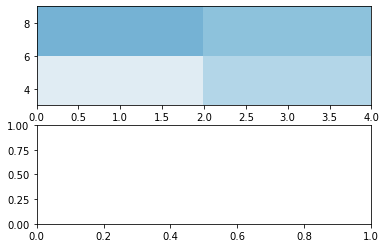

In [8]:
x1 = np.array([0,2,4])
y1 = np.array([3,6,9])

c,d = np.meshgrid(x1,y1)
print(c,d)
c = np.array(c)
d = np.array(d)
dataa = np.array([[20,50,60],[80,70,111],[90,170,111]])
dataa_min = -np.abs(dataa).max()
dataa_max = np.abs(dataa).max()
dataa = dataa[:-1,:-1]
print(dataa)
print(c.shape)
print(d.shape)
print(dataa.shape)
fig2,(ax2, ax3) = plt.subplots(2,1)

c1 = ax2.pcolor(c, d, dataa,vmax = dataa_max, vmin = dataa_min, cmap = 'RdBu')



plt.show()

(2903, 2903)
(2903, 2903)
(2274, 2274)


TypeError: Dimensions of C (2274, 2274) are incompatible with X (2903) and/or Y (2903); see help(pcolor)

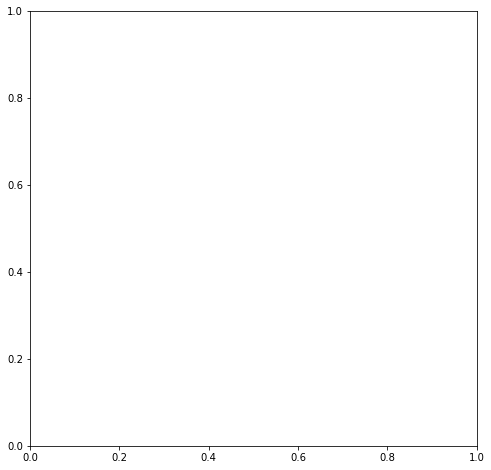

In [9]:
lon, lat = np.meshgrid(lons, lats)
xi,yi = m(lon, lat)
test = np.random.randint(139,202,(2274,2274))


plt.figure(figsize=(8,8))
print(xi.shape)
print(yi.shape)
print(test.shape)

c = m.pcolor(xi,yi,test)

m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

m.drawcoastlines()
m.drawstates()
m.drawcounties()

cbar = m.colorbar(c, location='bottom', pad="10%")

plt.show()

# 2.Basemap demo

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## 2.1 Equidistant Cylindrical Projection
等距圆柱投影

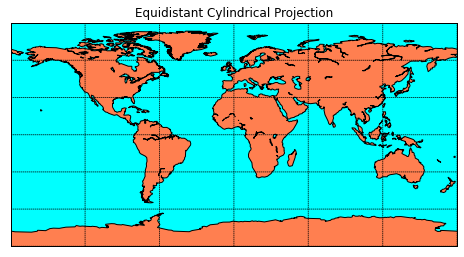

In [60]:
fig = plt.figure(figsize=(8, 8))
m1 = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
# 绘制海岸线
m1.drawcoastlines()
# 填充颜色（陆地和湖泊，不包括海洋）
m1.fillcontinents(color='coral',lake_color='aqua')
# 绘制参考线，方法中的**text_kwargs代表所绘制的平行|垂直参考线的位置
m1.drawparallels(np.arange(-90.,91.,30.))
m1.drawmeridians(np.arange(-180.,181.,60.))
# 填充边界颜色（海洋）
m1.drawmapboundary(fill_color='aqua')
plt.title("Equidistant Cylindrical Projection")
plt.show()

## 2.2Polar Azimuthal Equidistant Projection
极方位等距投影

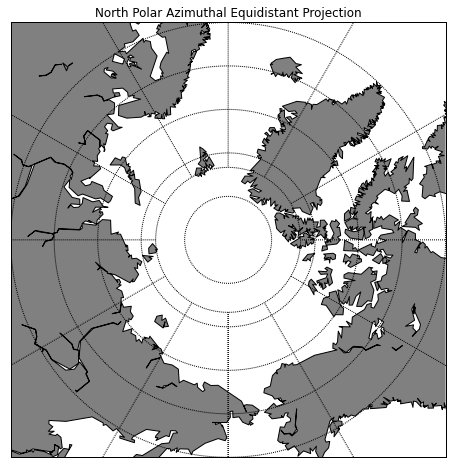

In [61]:
from matplotlib.patches import Polygon
fig = plt.figure(figsize=(8, 8))
# setup north polar aimuthal equidistant basemap.
# 经度 lon_0 与6点钟位置一致
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0.

m2 = Basemap(projection='npaeqd', boundinglat=60, lon_0=180,resolution='c')
m2.drawcoastlines()
m2.fillcontinents(color='gray',lake_color='white')
# draw parallels and meridians.
m2.drawparallels(np.arange(60.,90.,6.))
m2.drawmeridians(np.arange(-180.,181.,30.))
m2.drawmapboundary(fill_color='white')

plt.title("North Polar Azimuthal Equidistant Projection")
plt.show()

## 2.3 Orthographic Projection
正射投影

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


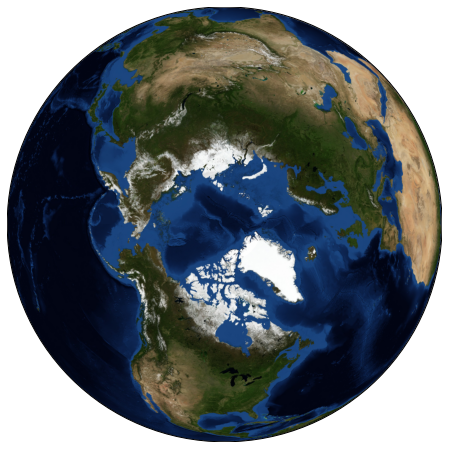

In [10]:
plt.figure(figsize=(8,8))

m3 = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=-90)
m3.bluemarble(scale = 0.5)

plt.show()

## 2.4 Lambert Conformal Projection
兰伯特正形投影

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(2347268.222744085, 4518079.266407731, ' Seattle')

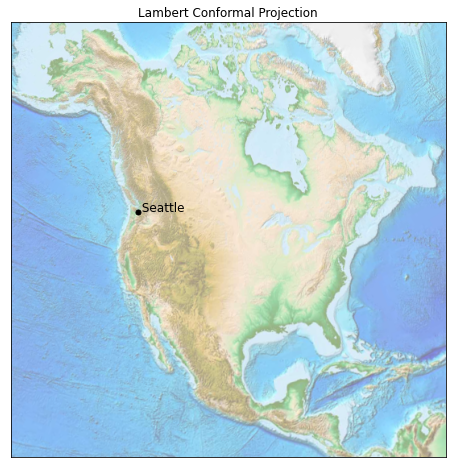

In [55]:
fig = plt.figure(figsize=(8, 8))
m4 = Basemap(projection='lcc', resolution=None,
           width = 8E6, height=8E6,
           lat_0=45, lon_0=-100)
m4.etopo(scale = 0.5,alpha=0.5)
x, y = m4(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.title('Lambert Conformal Projection')
plt.text(x, y, ' Seattle', fontsize=12)

## 2.5 Stereographic Projection
立体投影

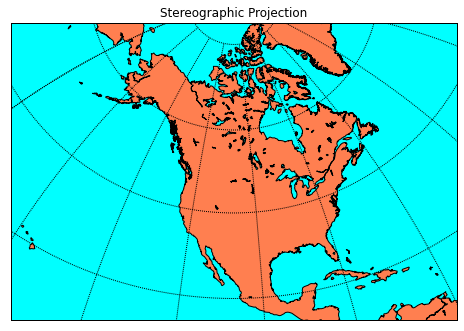

In [59]:
fig = plt.figure(figsize=(8, 8))
m5 = Basemap(width=12000000,height=8000000,
            resolution='l',projection='stere',\
            lat_ts=50,lat_0=50,lon_0=-107.)
m5.drawcoastlines()
m5.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m5.drawparallels(np.arange(-80.,81.,20.))
m5.drawmeridians(np.arange(-180.,181.,20.))
m5.drawmapboundary(fill_color='aqua')


plt.title("Stereographic Projection")
plt.show()

## 2.6 Polar Stereographic Projection
极方位立体投影

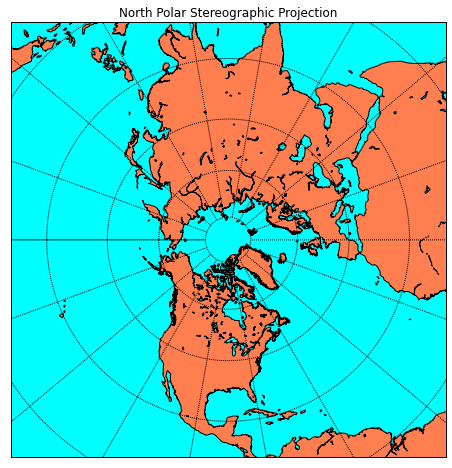

In [64]:
fig = plt.figure(figsize=(8, 8))
# setup north polar stereographic basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0. Default value of lat_ts
# (latitude of true scale) is pole.
m = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua')


plt.title("North Polar Stereographic Projection")
plt.show()

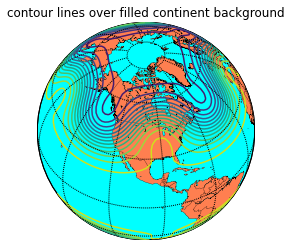

<Figure size 432x288 with 0 Axes>

In [10]:
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# 设置地图正射投影点为北纬50度， 西经100度，海岸线的分辨率为低
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
# 画出海岸线（描边）
map.drawcountries(linewidth=0.25)
# 画出国境线（描边）
map.fillcontinents(color='coral',lake_color='aqua')
# 填充大陆, 大陆颜色为珊瑚色， 湖泊颜色为水色
map.drawmapboundary(fill_color='aqua')
# 画出地图边界，海洋区域颜色为水色
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# 每三十度画出经纬度线
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# 在规则网格上填充数据
x, y = map(lons*180./np.pi, lats*180./np.pi)
#投影到球面上
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
# 以x,y为基准协调画出wave+mean的轮廓线， 轮廓线条数为15. 参数详情见
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.contour.html
plt.title('contour lines over filled continent background')
plt.show()
plt.savefig('contour lines over continent.jpg')

In [11]:
cnm = wave + mean